In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
babies = pd.read_csv('babies.tsv', delimiter='\s+')

In [7]:
babies.head(10)

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,123,999,0,36,69,190,0
4,108,282,0,23,67,125,1
5,136,286,0,25,62,93,0
6,138,244,0,33,62,178,0
7,132,245,0,23,65,140,0
8,120,289,0,25,62,125,0
9,143,299,0,30,66,136,1


In [20]:
columns = babies.columns

In [21]:
indices = babies.index

### Nominal vs Numerical

In [4]:
parity_missing = babies['parity']
parity_no_missing = babies[babies['parity'] != 9 ]['parity']

In [10]:
len(parity_missing) == len(parity_no_missing)

True

In [12]:
parity_no_missing.mean()

0.25485436893203883

In [15]:
parity_shifted = parity_no_missing + 1

In [ ]:
parity_shifted.mean()

### Missing Values

In [16]:
fraction_missing = babies.size // 10
fraction_missing

865

In [64]:
babies_na = babies.copy()  # good practice to make copies!

In [65]:
iteration = 0
while (iteration < fraction_missing):
    rand_col = np.random.choice(columns, 1)
    rand_row = np.random.choice(indices, 1)    
    babies_na.loc[rand_row, rand_col] = np.NaN    
    
    iteration += 1

In [59]:
babies_na.head(10)

,bwt,gestation,parity,age,height,weight,smoke
0,NaN,284.0,0.0,27.0,62.0,NaN,0.0
1,113.0,282.0,0.0,NaN,64.0,135.0,0.0
2,128.0,NaN,0.0,NaN,64.0,115.0,1.0
3,NaN,999.0,0.0,36.0,69.0,190.0,0.0
4,108.0,NaN,0.0,23.0,67.0,NaN,NaN
5,136.0,286.0,0.0,25.0,62.0,93.0,0.0
6,138.0,NaN,0.0,33.0,62.0,178.0,0.0
7,NaN,245.0,NaN,23.0,65.0,140.0,0.0
8,120.0,289.0,0.0,25.0,62.0,125.0,0.0
9,143.0,NaN,0.0,30.0,66.0,136.0,1.0


In [25]:
np.NaN + 0

nan

In [12]:
np.NaN * 10

nan

In [26]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64


Pandas treats None and NaN as essentially interchangeable for indicating missing or null values. There are several useful methods for detecting, removing, and replacing null values in Pandas 

 * isnull(): Generate a boolean mask indicating missing values
 * notnull(): Opposite of isnull()
 * dropna(): Return a filtered version of the data
 * fillna(): Return a copy of the data with missing values filled or imputed
    

### Age

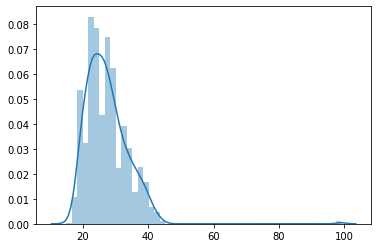

In [51]:
sns.distplot(babies['age'].values);

In [48]:
babies['age'].value_counts().sort_index()

15     1
17     7
18    15
19    53
20    58
21    67
22    79
23    93
24    86
25    77
26    90
27    85
28    70
29    66
30    63
31    46
32    39
33    42
34    33
35    30
36    26
37    29
38    18
39    24
40    11
41    14
42     4
43     6
44     1
45     1
99     2
Name: age, dtype: int64

In [72]:
babies_na['age'] = babies_na['age'].apply(lambda x: x if x != 99 else np.NaN)

In [74]:
99 in babies_na['age'].values

False

### Deleting Missing Values

In [75]:
age = babies_na[['age']]

In [76]:
age.isnull().head(10)

,age
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,True
8,False
9,False


In [77]:
age.dropna().head()

,age
0,27.0
1,33.0
2,28.0
3,36.0
4,23.0


In [78]:
age[~age.isnull()['age']].head()

,age
0,27.0
1,33.0
2,28.0
3,36.0
4,23.0


### Filling Missing Values

In [79]:
age.fillna(value=999, method=None).head()

,age
0,27.0
1,33.0
2,28.0
3,36.0
4,23.0


In [32]:
age.fillna(method='ffill').head()

,age
0,27.0
1,33.0
2,28.0
3,36.0
4,23.0


### Imputing Missing Values

In [80]:
avg_value = age['age'].fillna(value=0, method=None).mean()

In [81]:
age.fillna(value = avg_value, method=None).head()

,age
0,27.0
1,33.0
2,28.0
3,36.0
4,23.0


### Question: How fill with the most common value

In [82]:
most_common = age['age'].fillna(value = 0, method = None).value_counts().index[1]

In [83]:
age.fillna(value = most_common, method=None).head()

,age
0,27.0
1,33.0
2,28.0
3,36.0
4,23.0
